This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [551]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [552]:
df=pd.read_csv('loan_application.csv')

In [553]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [554]:
df.shape

(614, 13)

There are 614 rows and 13 columns

In [555]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [556]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are several null values in gender,married,dependents,selfemployed,loan ammount,loan amount term and credit history column.

In [557]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Null values in all categorical column were replaced by mode.

In [558]:

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

Null values in all numerical column were replaced by mean.

In [559]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [560]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


outliers were present in applicantsincome and coapplicant income.Skewness was also observed from difference in mean and median.

In [561]:
df.drop(['Loan_ID'],axis=1,inplace=True)

unnecessary column was dropped

In [562]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

Two unique values present in target column. so it is a case of classification.

In [563]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

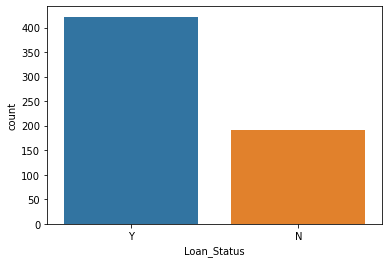

In [564]:
sb.countplot(df['Loan_Status'])

In [565]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [566]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [567]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [568]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [569]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# univariate analysis

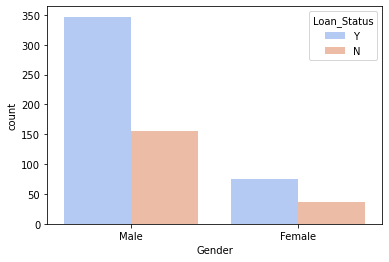

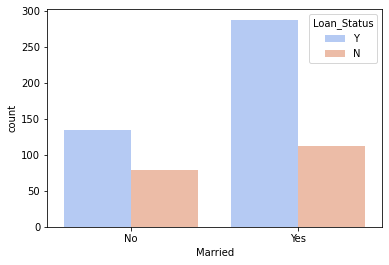

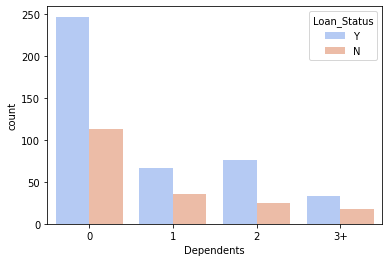

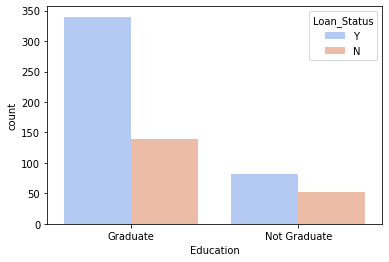

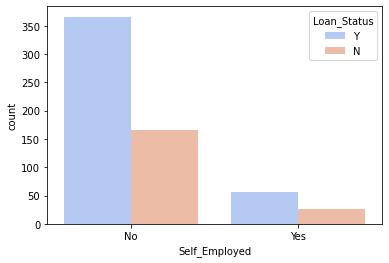

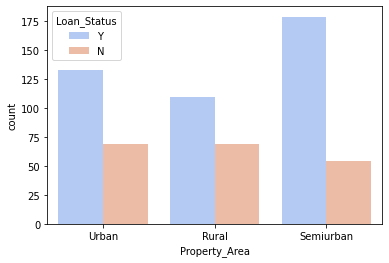

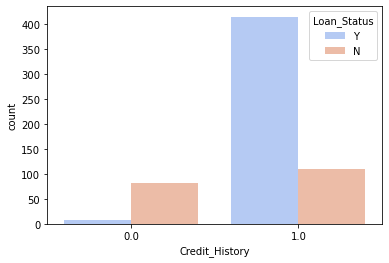

In [570]:
columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']
for i in columns:
    plt.figure(i)
    sb.countplot(df[i], palette='coolwarm', hue='Loan_Status',data=df);

Loan application was found to be independent of Gender.Married ppl were more likely to take loan as compared to unmarried persons.However the loan status was independent of marital status.
 People without having dependents are more likely to take loan.In Non graduates the rejection of loan application is higher than graduates. less number of self employed people apply for loan.People in sub urban area have lesser rejection as compared to urban and rural area.The most important analysis was that people with positive credit history were more likely to get loan approved

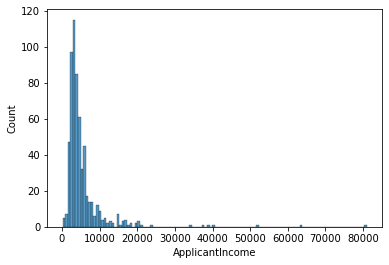

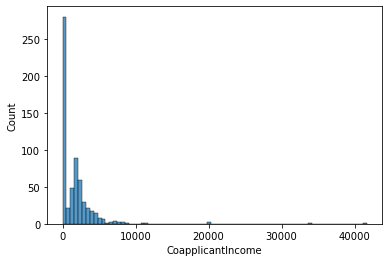

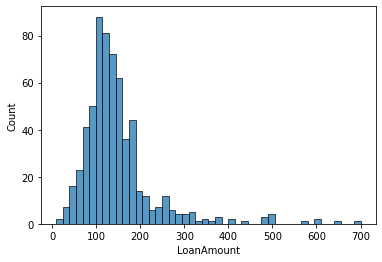

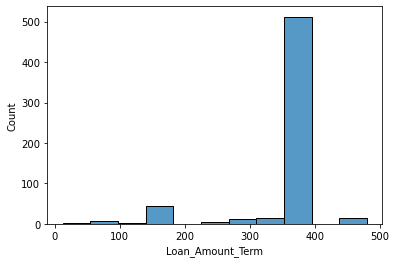

In [571]:
numerical_features=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in df[numerical_features]:
    plt.figure()
    sb.histplot(df[i])

In [572]:
pd.crosstab(df['Credit_History'],['Loan_Status'], margins=True)


col_0,Loan_Status,All
Credit_History,,
0.0,89,89
1.0,525,525
All,614,614


# Boxplot for outlier detection

<AxesSubplot:>

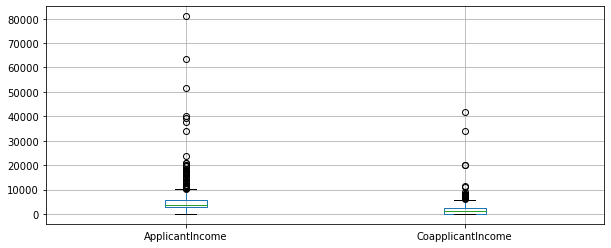

In [573]:
df.iloc[:,5:7].boxplot(figsize=[10,4])

<AxesSubplot:>

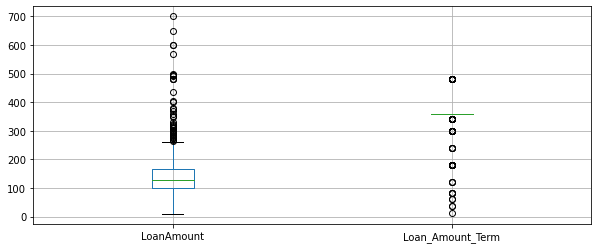

In [574]:
df.iloc[:,7:9].boxplot(figsize=[10,4])

In [575]:
df['Loan_Status']=df['Loan_Status'].replace('Y',1)
df['Loan_Status']=df['Loan_Status'].replace('N',0)

loan status were replaced from yes/no to numeric value

In [576]:
df['Loan_Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [577]:
df['Dependents']=df['Dependents'].replace('3+',4)
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

some values were represented as 3+.so was replaced as 4

In [578]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

# Transforming categorical values into numerical

In [579]:
from sklearn.preprocessing import LabelEncoder

In [580]:
list1=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [581]:
le=LabelEncoder()
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

# correlation

In [583]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<function matplotlib.pyplot.show(close=None, block=None)>

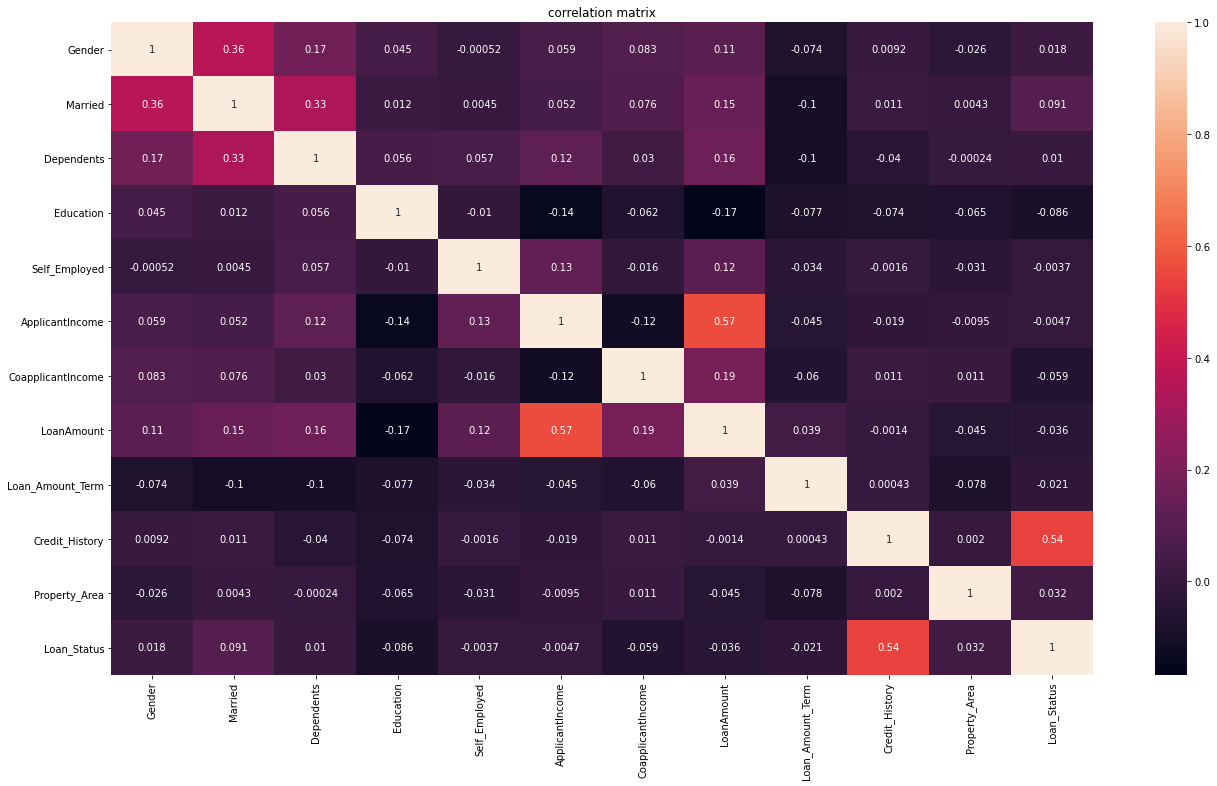

In [584]:
plt.figure(figsize=[22,12])
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show

loan ammount was positively correlated to applicants income and loan status to credit history

In [585]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

loan status was found to be correlated to credit history

# outlier removal

In [600]:
from scipy.stats import zscore

In [601]:
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [602]:
new_df.shape

(577, 12)

In [603]:
df.shape

(614, 12)

In [604]:
(614-577)*100/614

6.026058631921824

In [605]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# treating skewness with log transformation

In [606]:
new_df['ApplicantIncome']=np.log(new_df['ApplicantIncome'])

new_df['LoanAmount']=np.log(new_df['LoanAmount'])
new_df['Loan_Amount_Term']=np.log(new_df['Loan_Amount_Term'])

In [607]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,4.986426,5.886104,1.0,2,1
1,1,1,1,0,0,8.430109,1508.0,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,0.0,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,2358.0,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,0.0,4.948760,5.886104,1.0,2,1


<AxesSubplot:>

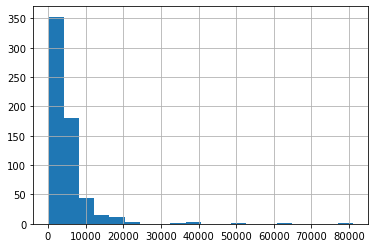

In [608]:
df['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

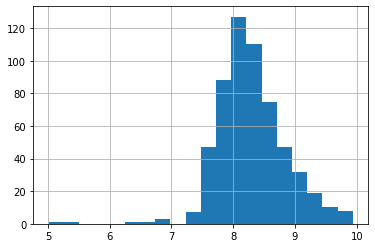

In [609]:
new_df['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

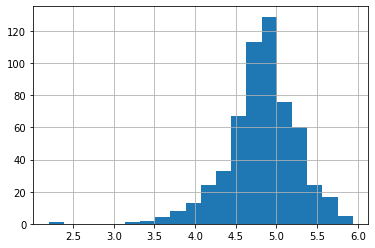

In [612]:
new_df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

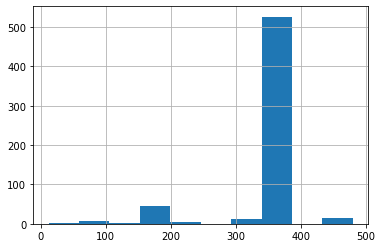

In [613]:
df['Loan_Amount_Term'].hist(bins=10)

<AxesSubplot:>

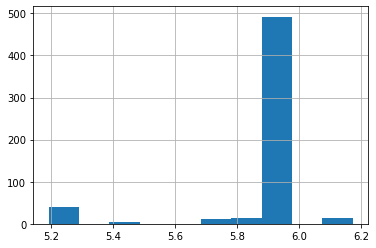

In [614]:
new_df['Loan_Amount_Term'].hist(bins=10)

# splitting of Data

In [616]:
y=new_df["Loan_Status"]
x=new_df.drop("Loan_Status",axis=1)

In [617]:
x.shape

(577, 11)

In [618]:
y.shape

(577,)

# normalisation

In [619]:
from sklearn.preprocessing import MinMaxScaler

In [620]:
scale=MinMaxScaler()
df2=scale.fit_transform(x)

In [621]:
df2=pd.DataFrame(df2,columns=x.columns)

In [622]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.743736,0.000000,0.745189,0.706695,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.694217,0.167929,0.709282,0.706695,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.608189,0.000000,0.532316,0.706695,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.577805,0.262584,0.692040,0.706695,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.748911,0.000000,0.735125,0.706695,1.0,1.0


In [623]:
x=df2

# model building

In [624]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# choosing best random state

In [625]:
from sklearn.linear_model import LogisticRegression
maxaccu=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=accuracy_score(y_test,predLR)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print(maxaccu)
print(maxrs)

0.8850574712643678
12


In [626]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=12)

In [627]:
model=model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

0.8850574712643678
[[ 23  19]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        42
           1       0.87      0.99      0.93       132

    accuracy                           0.89       174
   macro avg       0.92      0.77      0.81       174
weighted avg       0.89      0.89      0.87       174



0.7068965517241379
[[29 13]
 [38 94]]
              precision    recall  f1-score   support

           0       0.43      0.69      0.53        42
           1       0.88      0.71      0.79       132

    accuracy                           0.71       174
   macro avg       0.66      0.70      0.66       174
weighted avg       0.77      0.71      0.73       174



0.8850574712643678
[[ 23  19]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        42
           1       0.87      0.99      0.93       132

    accuracy                           0.89       174
  

# crossvalidation

In [628]:
from sklearn.model_selection import cross_val_score

In [629]:
lg=LogisticRegression()
print (cross_val_score(lg,x,y,cv=5).mean())
dtc=DecisionTreeClassifier()
print (cross_val_score(dtc,x,y,cv=5).mean())
svc=SVC()
print (cross_val_score(svc,x,y,cv=5).mean())
rfc=RandomForestClassifier()
print (cross_val_score(rfc,x,y,cv=5).mean())

0.8180809595202397
0.708920539730135
0.8180809595202397
0.8007496251874062


Random forest classifier was chosen as it has the least difference in accuracy and cv score.

# hyperparameter tuning

In [630]:
from sklearn.model_selection import RandomizedSearchCV

In [631]:
rfc=RandomForestClassifier()

In [632]:
n_estimators= [100,200,400,500,800,1000]
max_features= ['auto','sqrt','log2']
min_samples_split= [2,4,5,7,10]
min_samples_leaf= [1,2,5,7,9]
criterion=['gini','entropy']

In [633]:
params={'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':criterion}

In [634]:
params

{'n_estimators': [100, 200, 400, 500, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4, 5, 7, 10],
 'min_samples_leaf': [1, 2, 5, 7, 9],
 'criterion': ['gini', 'entropy']}

In [635]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = params, n_iter = 100, cv = 3, verbose=2,scoring='accuracy', random_state=12, n_jobs = -1)

In [636]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9],
                                        'min_samples_split': [2, 4, 5, 7, 10],
                                        'n_estimators': [100, 200, 400, 500,
                                                         800, 1000]},
                   random_state=12, scoring='accuracy', verbose=2)

In [637]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_features': 'log2',
 'criterion': 'gini'}

# final model with best parameter

In [642]:
Final_model=RandomForestClassifier(n_estimators= 1000, min_samples_split=4, min_samples_leaf=9, max_features='log2',criterion = 'gini')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8850574712643678
[[ 23  19]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        42
           1       0.87      0.99      0.93       132

    accuracy                           0.89       174
   macro avg       0.92      0.77      0.81       174
weighted avg       0.89      0.89      0.87       174



# saving the model

In [643]:
import joblib

In [644]:
filename='finalloanmodel.pkl'

In [645]:
joblib.dump(Final_model,'finalloanmodel.pkl')

['finalloanmodel.pkl']